In [1]:
import tomli as tomllib
from scipy.constants import Boltzmann as kB
from scipy.constants import pi
import numpy as np

from SensitivityAnalysis import Alpha
from Linearization import linearization
from ParameterCalc import *
from Dimensionalization import nondimensionalize

In [2]:
# Import data from TOML file
with open("config.toml", "rb") as f:
    data = tomllib.load(f)

locals().update(data)

In [3]:
# Calculate diffusivity, rate constants, and equilibrium constants from imported data
D = Diffusivity(SystemParameters['Temperature'], Mixture['Buffer']['Dynamic_viscosity'], Mixture['Chemoattractant']['Radius'])
k, k_Ads, Keq = [RateConstant(SystemParameters['Temperature'], **d) for d in list(RateConstants.values())]

In [4]:
# Nondimensionalize parameters
alpha, beta = nondimensionalize(Geometry['Length'], D, k, k_Ads)

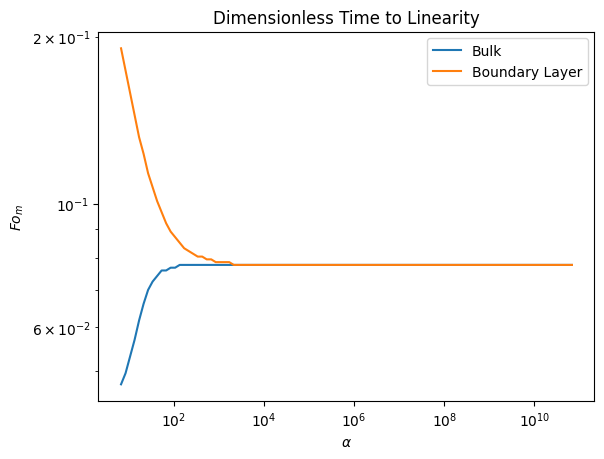

In [5]:
alpha_vals = np.logspace(np.log10(alpha) - 5, np.log10(alpha) + 5, 101)
fig = Alpha(linearization, alpha_vals, beta, Keq, linearity = 0.95)